In [1]:
#Set according to your directory system
import os
os.chdir("G:/Tejas/Python_prac/Customer_Segmentation_Project")
os.getcwd()

'G:\\Tejas\\Python_prac\\Customer_Segmentation_Project'

##Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Load Dataset

In [3]:
credit_data = pd.read_csv("credit_card_data.csv")
credit_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Information about dataset

In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit_data.shape

(8950, 18)

In [6]:
#Initial descriptive analysis of data
credit_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
#Find the total number of missing values in the dataframe
print("Missing values: ", credit_data.isnull().sum().values.sum(), "\n")

#Printing total number of unique values in the dataframe
print("Unique Values:\n", credit_data.nunique())

Missing values:  314 

Unique Values:
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


# Missing Value Analysis

In [8]:
credit_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
credit_data['CREDIT_LIMIT'].count()

8949

In [10]:
credit_data[credit_data['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [11]:
#Impute missing values with median

credit_data['CREDIT_LIMIT'].fillna(credit_data['CREDIT_LIMIT'].median(), inplace=True)
credit_data['CREDIT_LIMIT'].count()

8950

In [12]:
credit_data.iloc[5203, 13]

3000.0

In [13]:
min_pay = credit_data[credit_data['MINIMUM_PAYMENTS'].isnull()]
min_pay.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12


In [14]:
credit_data['MINIMUM_PAYMENTS'].fillna(credit_data['MINIMUM_PAYMENTS'].median(), inplace=True)
credit_data['MINIMUM_PAYMENTS'].count()

8950

In [15]:
credit_data.iloc[3, 15]

312.343947

In [16]:
credit_data.iloc[45, 15]

312.343947

In [17]:
credit_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Deriving New KPI

# 1.Monthly average purchase and cash advance amount

In [18]:
#Monthly Average Purchase

credit_data['Monthly_Avg_Purchase'] = credit_data['PURCHASES']/credit_data['TENURE']

print(credit_data['Monthly_Avg_Purchase'].head(), '\n', credit_data['TENURE'].head(), '\n', credit_data['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_Avg_Purchase, dtype: float64 
 0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


In [19]:
#Monthly Cash Advance Amount

credit_data['Monthly_cash_advance'] = credit_data['CASH_ADVANCE']/credit_data['TENURE']

In [20]:
credit_data.shape

(8950, 20)

In [21]:
credit_data[credit_data['ONEOFF_PURCHASES'] == 0]['ONEOFF_PURCHASES'].count()

4302

# 2.Purchases by type (one-off, instalments)

In [22]:
#Find what type of purchases are made on credit card

credit_data.iloc[:, [4, 5]]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [23]:
# Details for both the columns

credit_data[(credit_data.iloc[:, 4]==0) & (credit_data.iloc[:, 5]==0)].shape

(2042, 20)

In [24]:
credit_data[(credit_data.iloc[:, 4]>0) & (credit_data.iloc[:, 5]>0)].shape

(2774, 20)

In [25]:
credit_data[(credit_data.iloc[:, 4]>0) & (credit_data.iloc[:, 5]==0)].shape

(1874, 20)

In [26]:
credit_data[(credit_data.iloc[:, 4]==0) & (credit_data.iloc[:, 5]>0)].shape

(2260, 20)

As per the above details there are 4 types of purchase behaviour in the dataset.
We will derive a categorical variable based on their behavior

In [27]:
def purchase(credit_data):
    if(credit_data['ONEOFF_PURCHASES']==0) & (credit_data['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if(credit_data['ONEOFF_PURCHASES']>0) & (credit_data['INSTALLMENTS_PURCHASES']>0):
        return 'both_oneoff_installment'
    if(credit_data['ONEOFF_PURCHASES']>0) & (credit_data['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if(credit_data['ONEOFF_PURCHASES']==0) & (credit_data['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [28]:
credit_data['Purchase_Type'] = credit_data.apply(purchase, axis=1)

In [29]:
credit_data['Purchase_Type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: Purchase_Type, dtype: int64

In [30]:
credit_data.shape

(8950, 21)

***3. Average amount per purchase and Cash advance transaction***

Average amount per purchase

In [31]:
credit_data['Average_amt_per_purchase'] = credit_data.iloc[:, 3]/credit_data.iloc[:, 12]

In [32]:
credit_data['Avg_cash_advance'] = credit_data.iloc[:, 6]/credit_data.iloc[:, 11]

In [33]:
credit_data.shape

(8950, 23)

In [34]:
credit_data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_cash_advance,Purchase_Type,Average_amt_per_purchase,Avg_cash_advance
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,47.700000,NaN
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,NaN,1610.736371
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,64.430833,NaN
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,1499.000000,205.788017
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,16.000000,NaN
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,1800.0,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,installment,166.660000,NaN
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,13500.0,6354.314328,198.065894,1.000000,12,590.917500,0.000000,both_oneoff_installment,110.797031,NaN
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,2300.0,679.065082,532.033990,0.000000,12,36.350000,0.000000,installment,36.350000,NaN
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,7000.0,688.278568,311.963409,0.000000,12,71.790833,0.000000,both_oneoff_installment,172.298000,NaN
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,11000.0,1164.770591,100.302262,0.000000,12,106.800000,0.000000,one_off,427.200000,NaN


In [35]:
#On calculating Average amount per purchase and Cash advance transaction we get a lot of Null values(NaN),
#So we gonna drop both the variables from the dataset

credit_data.drop(['Average_amt_per_purchase'], axis=1)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_cash_advance,Purchase_Type,Avg_cash_advance
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,NaN
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,1610.736371
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,NaN
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,205.788017
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,installment,NaN
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,275.861322,312.343947,0.000000,6,50.000000,0.000000,installment,NaN
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,5,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,installment,NaN
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,0,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,none,18.279389


In [36]:
credit_data.drop(['Avg_cash_advance'], axis=1)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_cash_advance,Purchase_Type,Average_amt_per_purchase
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,47.700000
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,64.430833
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,1499.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,16.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,installment,48.520000
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,275.861322,312.343947,0.000000,6,50.000000,0.000000,installment,50.000000
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,5,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,installment,28.880000
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,0,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,none,NaN


In [37]:
credit_data = credit_data.drop(['Average_amt_per_purchase', 'Avg_cash_advance'], axis=1)

In [38]:
credit_data.shape

(8950, 21)

In [39]:
credit_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_Avg_Purchase                0
Monthly_cash_advance                0
Purchase_Type                       0
dtype: int64

# 4.Limit Usage (balance to credit limit ratio)

In [40]:
#Credit Card Utilization

credit_data['Limit_Usage'] = credit_data.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [41]:
credit_data['Limit_Usage'].head(5)

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: Limit_Usage, dtype: float64

In [42]:
credit_data.shape

(8950, 22)

# 5.Payments to minimum payments ratio

In [43]:
credit_data['Payment_minpay'] = credit_data.apply(lambda x: x['PAYMENTS']/x['MINIMUM_PAYMENTS'], axis = 1)

In [44]:
credit_data['Payment_minpay'].head(10)

0     1.446508
1     3.826241
2     0.991682
3     0.000000
4     2.771075
5     0.581601
6    32.081820
7     1.276357
8     2.206280
9    11.612605
Name: Payment_minpay, dtype: float64

In [45]:
credit_data.shape

(8950, 23)

In [46]:
credit_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_Avg_Purchase                0
Monthly_cash_advance                0
Purchase_Type                       0
Limit_Usage                         0
Payment_minpay                      0
dtype: int64

# Outlier Analysis

Since there are variables having extreme values, so I am doing log-transformation on the dataset to remove outlier effect

In [47]:
credit_outlier = credit_data.drop(['CUST_ID', 'Purchase_Type'], axis=1).applymap(lambda x:np.log(x+1))

In [48]:
credit_outlier.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_cash_advance,Limit_Usage,Payment_minpay
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360
5,7.501540,0.693147,7.196147,0.000000,7.196147,0.000000,0.510826,0.000000,0.459532,0.000000,...,2.197225,7.496097,7.244983,7.786654,0.000000,2.564949,4.719451,0.000000,0.695874,0.458438
6,6.442955,0.693147,8.866724,8.764620,6.535793,0.000000,0.693147,0.693147,0.693147,0.000000,...,4.174387,9.510519,8.757047,5.293636,0.693147,2.564949,6.383367,0.000000,0.045417,3.498984
7,7.509145,0.693147,6.080391,0.000000,6.080391,0.000000,0.693147,0.000000,0.693147,0.000000,...,2.564949,7.741099,6.522189,6.278585,0.000000,2.564949,3.620333,0.000000,0.583830,0.822576
8,6.923556,0.693147,6.759824,6.496005,5.303305,0.000000,0.287682,0.080042,0.223144,0.000000,...,1.791759,8.853808,6.535645,5.746086,0.000000,2.564949,4.287590,0.000000,0.135395,1.165111
9,5.031914,0.435318,7.156645,7.156645,0.000000,0.000000,0.154151,0.154151,0.000000,0.000000,...,1.386294,9.305741,7.061138,4.618109,0.000000,2.564949,4.680278,0.000000,0.013744,2.534697


In [49]:
credit_outlier.shape

(8950, 21)

In [50]:
credit_outlier.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_cash_advance,Limit_Usage,Payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [51]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=credit_outlier[[x for x in credit_outlier.columns if x not in col ]]

In [52]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_Avg_Purchase',
       'Monthly_cash_advance', 'Limit_Usage', 'Payment_minpay'],
      dtype='object')

In [53]:
credit_outlier.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_Avg_Purchase', 'Monthly_cash_advance', 'Limit_Usage',
       'Payment_minpay'],
      dtype='object')

# Insight on the customer profiles

Average payment_minpayment ratio for each purchse type.

In [54]:
x=credit_data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

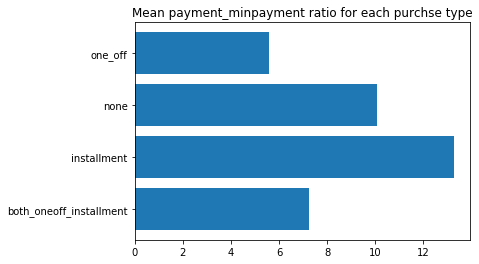

In [55]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

customers with installment purchases are paying dues

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

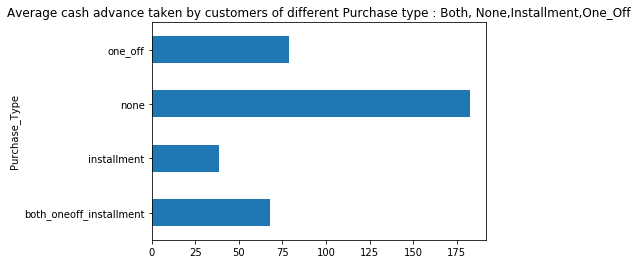

In [56]:
credit_data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()
plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

Customers who don't do either one-off or installment purchases take more cash on advance

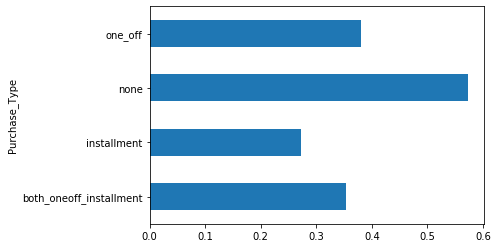

In [57]:
credit_data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Limit_Usage'])).plot.barh()

In [58]:
credit_original = pd.concat([credit_data, pd.get_dummies(credit_data['Purchase_Type'])], axis=1)

In [59]:
credit_original.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_Avg_Purchase,Monthly_cash_advance,Purchase_Type,Limit_Usage,Payment_minpay,both_oneoff_installment,installment,none,one_off
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,12,7.950000,0.000000,installment,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,12,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,64.430833,0.000000,one_off,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,12,124.916667,17.149001,one_off,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,12,1.333333,0.000000,one_off,0.681429,2.771075,0,0,0,1
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,12,111.106667,0.000000,installment,1.005460,0.581601,0,1,0,0
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,12,590.917500,0.000000,both_oneoff_installment,0.046464,32.081820,1,0,0,0
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,12,36.350000,0.000000,installment,0.792892,1.276357,0,1,0,0
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,12,71.790833,0.000000,both_oneoff_installment,0.144989,2.206280,1,0,0,0
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,12,106.800000,0.000000,one_off,0.013839,11.612605,0,0,0,1


# Preparing dataset for Machine Learning Algorithm

There are a few categorical data which we need to convert with dummy creations

In [60]:
# Creating dummies for categorical variable

cr_pre['Purchase_Type'] = credit_data.loc[:, 'Purchase_Type']
pd.get_dummies(cr_pre['Purchase_Type'])

C:\Users\GIRI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,both_oneoff_installment,installment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


Now merge the created dummy with the original dataframe

In [61]:
cr_dummy = pd.concat([cr_pre, pd.get_dummies(cr_pre['Purchase_Type'])], axis=1)

In [62]:
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_Avg_Purchase                False
Monthly_cash_advance                False
Limit_Usage                         False
Payment_minpay                      False
Purchase_Type                       False
both_oneoff_installment             False
installment                         False
none                                False
one_off                             False
dtype: bool

In [63]:
l = ['Purchase_Type']

In [64]:
#We are removing the Payment_Type variable
cr_dummy = cr_dummy.drop(l, axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_Avg_Purchase                False
Monthly_cash_advance                False
Limit_Usage                         False
Payment_minpay                      False
both_oneoff_installment             False
installment                         False
none                                False
one_off                             False
dtype: bool

In [65]:
cr_dummy.shape

(8950, 17)

In [66]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_Avg_Purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  Limit_Usage                       8950 non-null   float64
 12  Paymen

In [67]:
cr_dummy.head(10)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_cash_advance,Limit_Usage,Payment_minpay,both_oneoff_installment,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1
5,0.693147,0.000000,7.196147,0.510826,0.000000,0.459532,0.000000,0.000000,2.197225,4.719451,0.000000,0.695874,0.458438,0,1,0,0
6,0.693147,8.764620,6.535793,0.693147,0.693147,0.693147,0.000000,0.000000,4.174387,6.383367,0.000000,0.045417,3.498984,1,0,0,0
7,0.693147,0.000000,6.080391,0.693147,0.000000,0.693147,0.000000,0.000000,2.564949,3.620333,0.000000,0.583830,0.822576,0,1,0,0
8,0.693147,6.496005,5.303305,0.287682,0.080042,0.223144,0.000000,0.000000,1.791759,4.287590,0.000000,0.135395,1.165111,1,0,0,0
9,0.435318,7.156645,0.000000,0.154151,0.154151,0.000000,0.000000,0.000000,1.386294,4.680278,0.000000,0.013744,2.534697,0,0,0,1


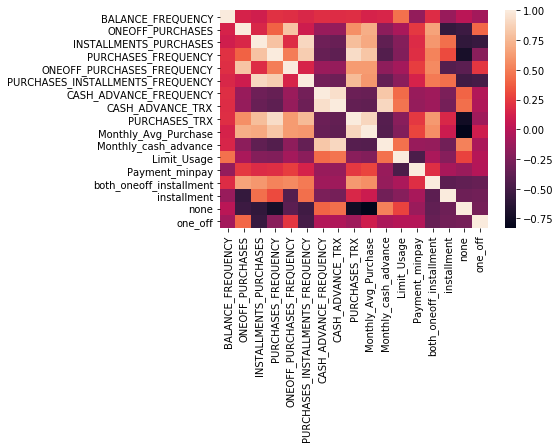

In [68]:
#Plot a correlation heatmap

sns.heatmap(cr_dummy.corr())

Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data

Before applying PCA we will standardize data to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

# Standardizing Data

In [69]:
#Making each data of same scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [70]:
cr_scaled = sc.fit_transform(cr_dummy)

In [71]:
cr_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249]])

# Applying PCA

Principal Component Analysis is used to reduce the features(Dimentionality reduction)

In [72]:
from sklearn.decomposition import PCA

In [73]:
cr_dummy.shape

(8950, 17)

In [74]:
#In PCA the n component is the total no of features

pc = PCA(n_components=17)
cr_pca = pc.fit(cr_scaled)

In [75]:
#Let's check if we take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%

sum(cr_pca.explained_variance_ratio_)

1.0

In [76]:
var_ratio = {}
for n in range(2, 18):
    pc = PCA(n_components=n)
    cr_pca = pc.fit(cr_scaled)
    var_ratio[n] = sum(cr_pca.explained_variance_ratio_)

In [77]:
var_ratio

{2: 0.5826439793960286,
 3: 0.7299379309512697,
 4: 0.8115442762351255,
 5: 0.8770555795291435,
 6: 0.9186492443512613,
 7: 0.9410925256030125,
 8: 0.9616114053683061,
 9: 0.973978708199065,
 10: 0.9835896584630708,
 11: 0.989724810734195,
 12: 0.9927550009135233,
 13: 0.9953907562385428,
 14: 0.9979616898169594,
 15: 0.9996360473172955,
 16: 1.0,
 17: 1.0}

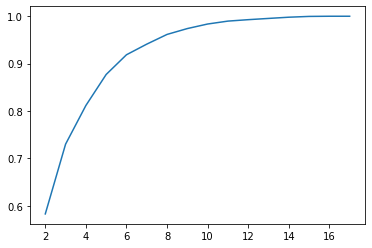

In [78]:
pd.Series(var_ratio).plot()

Since 6 components are explaining about 90% variance so we select 6 components

In [79]:
pc = PCA(n_components=6)

In [80]:
p = pc.fit(cr_scaled)

In [81]:
cr_scaled.shape

(8950, 17)

In [82]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ,
       0.70717132])

In [83]:
np.sum(p.explained_variance_)

15.618782269308777

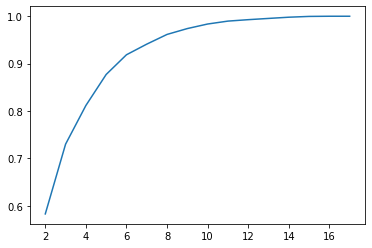

In [84]:
pd.Series(var_ratio).plot()

In [85]:
pc_final = PCA(n_components=6).fit(cr_scaled)

reduced_cr = pc_final.fit_transform(cr_scaled)

In [86]:
dd = pd.DataFrame(reduced_cr)

In [87]:
dd.head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


So Initially we had 17 variables now we have 6 so the variables go reduced

In [88]:
dd.shape

(8950, 6)

In [89]:
col_list = cr_dummy.columns

In [90]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_Avg_Purchase',
       'Monthly_cash_advance', 'Limit_Usage', 'Payment_minpay',
       'both_oneoff_installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [91]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)], index = col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
Monthly_Avg_Purchase,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


So above data gave us eigen vector for each component, if we had all eigen vector value very small we can remove those variable but in our case its not

In [92]:
#Factor Analysis : variance explained by each component

pd.Series(pc_final.explained_variance_ratio_, index=['PC_' +str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

# Clustering

Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

In [93]:
from sklearn.cluster import KMeans

In [94]:
km_cls4 = KMeans(n_clusters=4, random_state=123)

In [95]:
km_cls4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [96]:
km_cls4.labels_

array([0, 1, 3, ..., 0, 1, 3])

In [97]:
pd.Series(km_cls4.labels_).value_counts()

2    2769
0    2224
1    2088
3    1869
dtype: int64

***Hear we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.***

# Identifying Cluster Error

In [98]:
cluster_range = range(1, 21)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(reduced_cr)
    cluster_errors.append(clusters.inertia_)
    #clusters.inertia_ is actually cluster error here

In [99]:
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,139772.482528
1,2,93308.097591
2,3,70745.243679
3,4,49446.066485
4,5,42548.605568
5,6,37713.045270
6,7,34290.792119
7,8,31285.586485
8,9,28867.756593
9,10,26302.901710


# Elbow Method

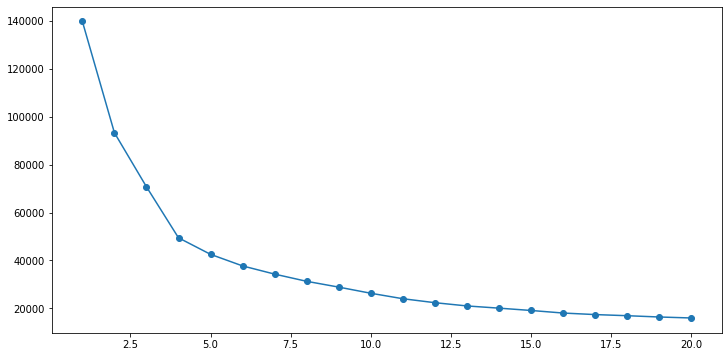

In [100]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

***From the above elbow method we find the elbow range here as 4, 5, 6***

# Shilouette Coeffiecient

In [101]:
from sklearn import metrics

In [102]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [103]:
scores

[0.3312680667306928,
 0.3543495425284325,
 0.43708577439659496,
 0.43123723718523893,
 0.42288676393994196,
 0.3937963135186254,
 0.41809162539140154,
 0.38917300772433827,
 0.39313864497489587,
 0.3678804540227034,
 0.3670035207564237,
 0.3513315057884269,
 0.352614783540178,
 0.32954227834412875,
 0.3339471644625439,
 0.33818909037815487,
 0.33542825363905726,
 0.3304092305070634,
 0.3215328121767455]

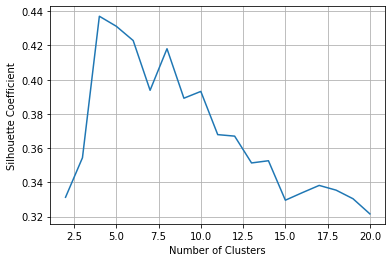

In [104]:
#Plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

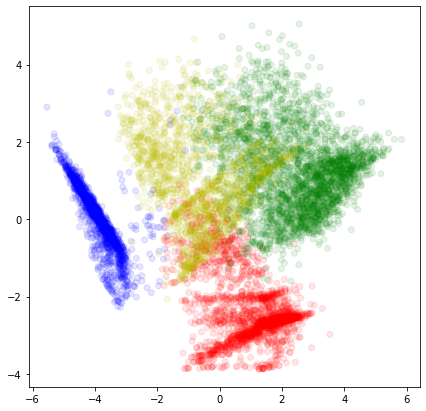

In [105]:
color_map = {0 : 'r', 1 : 'b', 2 : 'g', 3 : 'y'}
# Here l is Purchase_Type(Behavior) we had 4 types
label_color = [color_map[l] for l in km_cls4.labels_]
plt.figure(figsize=(7, 7))
plt.scatter(reduced_cr[:, 0], reduced_cr[:, 1], c = label_color, cmap = 'Spectral', alpha = 0.1)

***It is very difficult to draw individual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps***

In [106]:
df_pair_plot = pd.DataFrame(reduced_cr, columns=['PC_' +str(i) for i in range(6)])

In [107]:
#Add cluster column in the dataframe which specifies which cluster it belongs to

df_pair_plot['Cluster'] = km_cls4.labels_

In [108]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,0
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,3
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,3
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,3


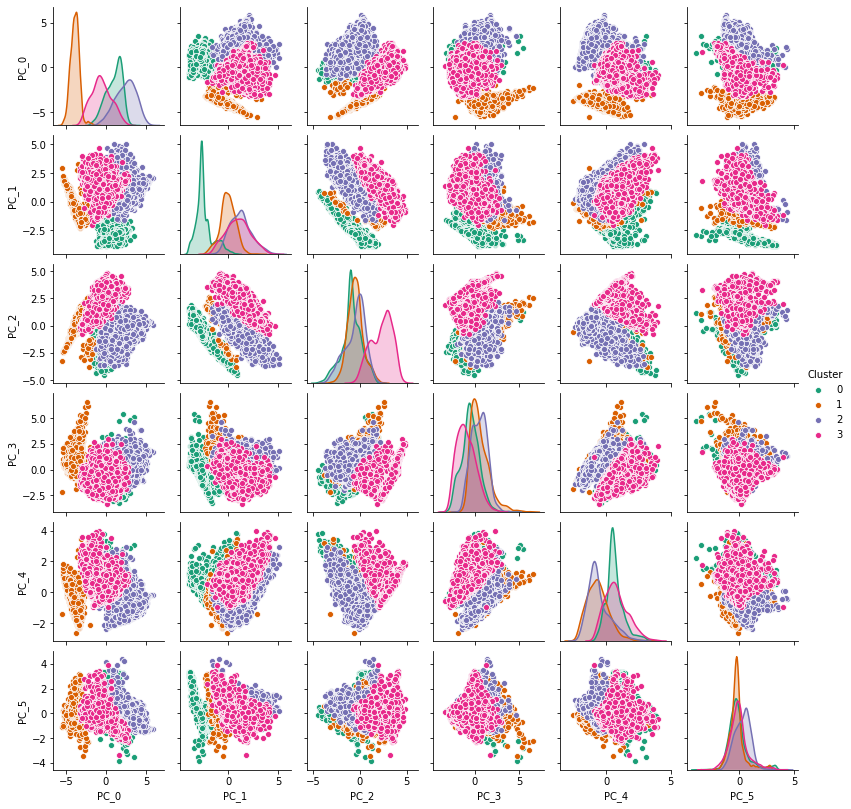

In [109]:
#pairwise relationship of components on the data

sns.pairplot(df_pair_plot, hue='Cluster', palette= 'Dark2', diag_kind='kde', height=1.85)

***It shows that first two components are able to indentify clusters***

***Now we have done here with Principal Component Analysis now we need to bring our original dataframe and we will merge the cluster with them.***

***To interprate result we need to use our dataframe***

In [110]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

col_kpi = ['PURCHASES_TRX','Monthly_Avg_Purchase','Monthly_cash_advance','Limit_Usage','CASH_ADVANCE_TRX',
         'Payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [111]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_cash_advance,Limit_Usage,Payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [112]:
#Concatenating labels found through KMeans with data

clusters_df_4 = pd.concat([credit_original[col_kpi], pd.Series(km_cls4.labels_, name = 'Cluster_4')], axis=1)

In [113]:
clusters_df_4.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_cash_advance,Limit_Usage,CASH_ADVANCE_TRX,Payment_minpay,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,3
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,3
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,3


In [114]:
# Mean value gives a good indication of the distribution of data. So we find mean value for each variable for each cluster

cluster_4 = clusters_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,12.062050,0.043582,33.013723,7.127341
Monthly_Avg_Purchase,47.626256,0.148297,193.008043,69.875917
Monthly_cash_advance,33.550080,186.281319,67.466910,78.098613
Limit_Usage,0.264745,0.576076,0.353591,0.379761
CASH_ADVANCE_TRX,1.021133,6.540230,2.804261,2.881220
Payment_minpay,13.422420,9.936617,7.245651,5.573672
both_oneoff_installment,0.000000,0.001916,1.000000,0.000535
installment,1.000000,0.017241,0.000000,0.000000
one_off,0.000000,0.002874,0.000000,0.999465
none,0.000000,0.977969,0.000000,0.000000


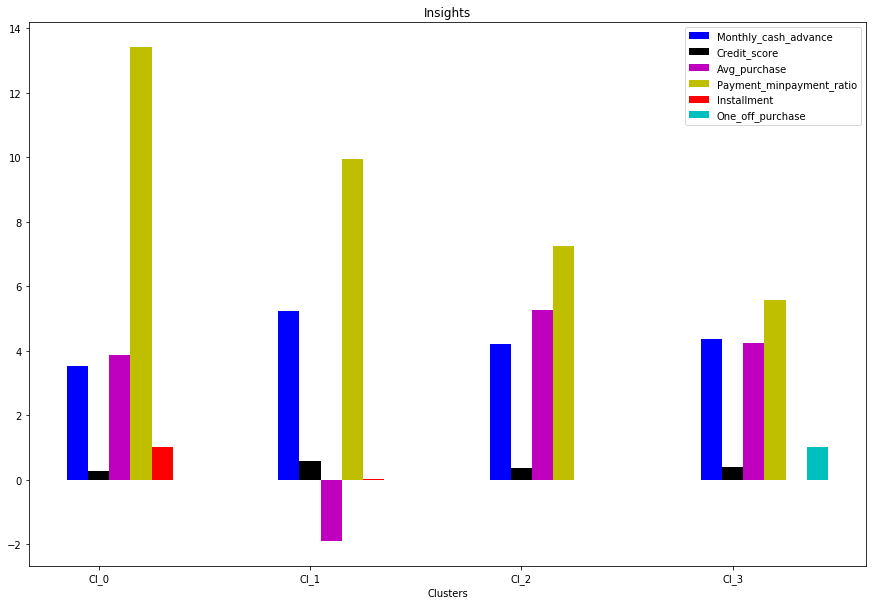

In [115]:
fig,ax = plt.subplots(figsize = (15, 10))
index = np.arange(len(cluster_4.columns))

cash_advance = np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score = cluster_4.loc['Limit_Usage',:].values
purchase = np.log(cluster_4.loc['Monthly_Avg_Purchase',:].values)
payment = cluster_4.loc['Payment_minpay',:].values
installment = cluster_4.loc['installment',:].values
one_off = cluster_4.loc['one_off',:].values


bar_width = .10
b1 = plt.bar(index, cash_advance, color = 'b', label = 'Monthly_cash_advance', width = bar_width)
b2 = plt.bar(index+bar_width, credit_score, color = 'k', label = 'Credit_score', width = bar_width)
b3 = plt.bar(index+2*bar_width, purchase, color = 'm', label = 'Avg_purchase', width = bar_width)
b4 = plt.bar(index+3*bar_width, payment, color = 'y', label = 'Payment_minpayment_ratio', width = bar_width)
b5 = plt.bar(index+4*bar_width, installment, color = 'r', label = 'Installment', width = bar_width)
b6 = plt.bar(index+5*bar_width, one_off, color = 'c', label = 'One_off_purchase', width = bar_width)

plt.xlabel("Clusters")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl_0', 'Cl_1', 'Cl_2', 'Cl_3'))
plt.legend()

In [116]:
# Percentage of each cluster in the total customer base

s = clusters_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print(s), '\n'

per = pd.Series((s.values.astype('float')/ clusters_df_4.shape[0]) * 100, name = 'Percentage')
print("Cluster -4"), '\n'
print(pd.concat([pd.Series(s.values, name = 'Size'), per], axis = 1))

Cluster_4   
0          0    2224
1          1    2088
2          2    2769
3          3    1869
Name: Cluster_4, dtype: int64
Cluster -4
   Size  Percentage
0  2224   24.849162
1  2088   23.329609
2  2769   30.938547
3  1869   20.882682


***Insights***

***Clusters are clearly distinguishing behaviour within clustomers***
1. Cluster 0 is the group of customers who have highest Payment Ratio and doing installment purchases, have comparatively good credit score. * This group is about 25% of the total customer base *

2. Cluster 1 is taking maximum advance_cash and is paying comparatively less minimum payment and doing no purchase transaction. * This group is about 23% of the total customer base *

3. Cluster 2 customers have maximum Purchase transaction and are paying dues and are doing least installment purchases. * This group is about 31% of the total customer base *

4. Cluster 3 customers are doing maximum One_Off transactions and least payment ratio. * This group is about 21% of the total customer base *

# Analyzing behaviors with 5 Clusters

In [117]:
km_cls5 = KMeans(n_clusters=5, random_state=123)
km_cls5 = km_cls5.fit(reduced_cr)
km_cls5.labels_

array([3, 0, 1, ..., 3, 0, 1])

In [118]:
pd.Series(km_cls5.labels_).value_counts()

3    2149
0    2081
2    1977
1    1862
4     881
dtype: int64

Text(0, 0.5, 'PC_1')

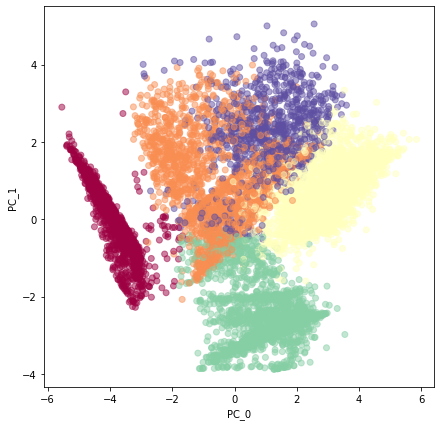

In [119]:
plt.figure(figsize=(7, 7))
plt.scatter(reduced_cr[:, 0], reduced_cr[:, 1], c = km_cls5.labels_, cmap = 'Spectral', alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [120]:
clusters_df_5 = pd.concat([credit_original[col_kpi], pd.Series(km_cls5.labels_, name = 'Cluster_5')], axis = 1)

In [121]:
# Finding Mean of features for each cluster

clusters_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,0.032196,7.096670,34.587759,11.905537,27.703746
Monthly_Avg_Purchase,0.086126,68.917645,210.536468,47.369817,141.584086
Monthly_cash_advance,185.038534,74.517541,4.040708,20.636870,249.942101
Limit_Usage,0.576110,0.377959,0.258931,0.250011,0.600096
CASH_ADVANCE_TRX,6.448823,2.697637,0.152757,0.550489,10.384790
Payment_minpay,9.963172,5.562287,8.675499,13.783426,3.651686
both_oneoff_installment,0.000000,0.002148,1.000000,0.000000,0.900114
installment,0.015858,0.000000,0.000000,1.000000,0.088536
one_off,0.002883,0.997852,0.000000,0.000000,0.011351
none,0.981259,0.000000,0.000000,0.000000,0.000000


# Insights of 5 Clusters

1. We have a group of customers (cluster 1) having highest average purchases but there is Cluster 4 also having highest cash advance & second highest purchase behavior but their type of purchases are same.

2. Cluster 1 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side

***So we don't have quite distinguishable characteristics with 5 clusters***

In [122]:
# Percentage of each Cluster

no_cls5 = clusters_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())

print ("Cluster -5"),'\n'
percentage_5=pd.Series((no_cls5.values.astype('float')/ clusters_df_5.shape[0])*100, name = 'Percentage')
print (pd.concat([pd.Series(no_cls5.values, name = 'Size'), percentage_5], axis=1))

Cluster -5
   Size  Percentage
0  2081   23.251397
1  1862   20.804469
2  1977   22.089385
3  2149   24.011173
4   881    9.843575


# Analysing behavior with 6 Clusters

In [123]:
km_cls6 = KMeans(n_clusters=6).fit(reduced_cr)
km_cls6.labels_

array([0, 1, 4, ..., 0, 1, 3])

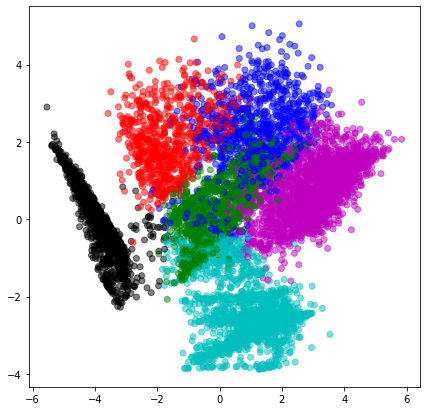

In [124]:
color_map = {0:'c', 1:'k', 2:'m', 3:'r', 4:'g', 5:'b'}
label_color = [color_map[l] for l in km_cls6.labels_]
plt.figure(figsize=(7, 7))
plt.scatter(reduced_cr[:, 0], reduced_cr[:, 1], c = label_color, cmap='Spectral', alpha=0.5)

In [125]:
clusters_df_6 = pd.concat([credit_original[col_kpi], pd.Series(km_cls6.labels_, name = 'Cluster_6')], axis=1)

In [126]:
no_cls6 = clusters_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
no_cls6

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,11.905537,0.030347,34.663789,5.958512,7.764159,27.919908
Monthly_Avg_Purchase,47.369817,0.088891,211.196582,53.845679,78.709899,140.374727
Monthly_cash_advance,20.636870,184.829434,4.027720,205.688263,3.664199,242.856971
Limit_Usage,0.250011,0.575724,0.258206,0.606140,0.245953,0.600654
CASH_ADVANCE_TRX,0.550489,6.434971,0.150838,7.652361,0.125951,10.000000
Payment_minpay,13.783426,9.976487,8.702974,3.259302,6.907951,3.616973
both_oneoff_installment,0.000000,0.000000,1.000000,0.000000,0.006762,0.911899
installment,1.000000,0.016378,0.000000,0.000000,0.000000,0.088101
one_off,0.000000,0.000000,0.000000,1.000000,0.993238,0.000000
none,0.000000,0.983622,0.000000,0.000000,0.000000,0.000000


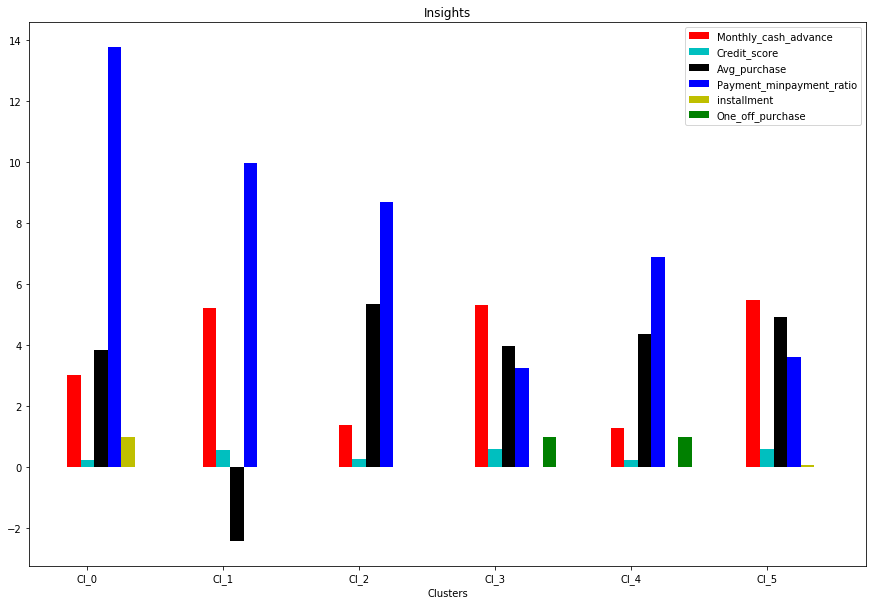

In [127]:
fig,ax = plt.subplots(figsize = (15, 10))
index = np.arange(len(no_cls6.columns))

cash_advance = np.log(no_cls6.loc['Monthly_cash_advance',:].values)
credit_score = (no_cls6.loc['Limit_Usage',:].values)
purchase = np.log(no_cls6.loc['Monthly_Avg_Purchase',:].values)
payment = no_cls6.loc['Payment_minpay',:].values
installment = no_cls6.loc['installment',:].values
one_off = no_cls6.loc['one_off',:].values

bar_width = .10
b1 = plt.bar(index, cash_advance, color='r', label = 'Monthly_cash_advance', width=bar_width)
b2 = plt.bar(index+bar_width, credit_score, color = 'c', label = 'Credit_score', width=bar_width)
b3 = plt.bar(index+2*bar_width, purchase, color = 'k', label = 'Avg_purchase', width=bar_width)
b4 = plt.bar(index+3*bar_width, payment, color = 'b', label = 'Payment_minpayment_ratio', width = bar_width)
b5 = plt.bar(index+4*bar_width, installment, color = 'y', label = 'installment', width = bar_width)
b6 = plt.bar(index+5*bar_width, one_off, color = 'g', label = 'One_off_purchase', width = bar_width)

plt.xlabel('Clusters')
plt.title('Insights')
plt.xticks(index + bar_width, ('Cl_0', 'Cl_1', 'Cl_2', 'Cl_3', 'Cl_4', 'Cl_5'))

plt.legend()

# Insights of 6 Clusters

1. Here also groups are overlapping

2. Cluster 4 and Cluster 5 are seem to behave same

# Checking Performance Metrics for KMeans

***I am validating performance with 2 metrics Calinski Harabaz and Silhouette score***

In [128]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score

In [129]:
score = {}
score_calinski = {}
for n in range(3, 10):
    km_score = KMeans(n_clusters = n)
    km_score.fit(reduced_cr)
    score_calinski[n] = calinski_harabasz_score(reduced_cr, km_score.labels_)
    score[n] = silhouette_score(reduced_cr, km_score.labels_)

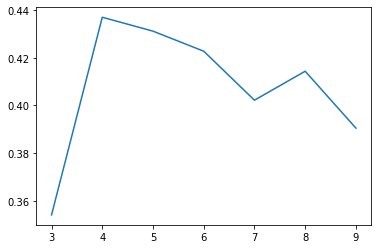

In [130]:
pd.Series(score).plot()

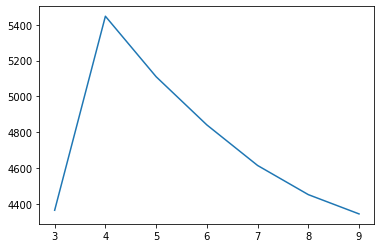

In [131]:
pd.Series(score_calinski).plot()

# Performance metrics also suggest that K-means with 4 cluster is able to show distinguished characteristics of each cluster.

***Insights with 4 Clusters***

1. Cluster 0 is the group of customers who have highest Payment Ratio and doing installment purchases, have comparatively good credit score. * This group is about 25% of the total customer base *

2. Cluster 1 is taking maximum advance_cash and is paying comparatively less minimum payment and doing no purchase transaction. * This group is about 23% of the total customer base *

3. Cluster 2 customers have maximum Purchase transaction and are paying dues and are doing least installment purchases. * This group is about 31% of the total customer base *

4. Cluster 3 customers are doing maximum One_Off transactions and least payment ratio. * This group is about 21% of the total customer base *

# Suggested Marketing Strategy

**a. Group 0**
1. This group is performing best among all as cutomers are maintaining good credit score and paying dues on time. -- Giving rewards point will make them perform more purchases.

**c. Group 1**
3. They have poor credit score and taking only cash on advance. We can target them by providing less interest rate on purchase transaction

***b. Group 2***
2. They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score ) -- we can increase credit limit or can lower down interest rate -- Can be given premium card /loyality cards to increase transactions

**d. Group 3**
4. This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.

